In [1]:
from datetime import datetime
import tensorflow as tf
import importlib
import numpy as np
import importlib


In [2]:
# import config 
import configs.config
importlib.reload(configs.config)
from configs.config import CFG
from utils import config
import pandas as pd
config = config.Config.from_json(CFG)
data = config.data
paths = config.paths
df_events = pd.read_csv(paths.train_events)
series_ids = list(df_events["series_id"].unique())
series = {}
series_names = set()   
#steps_window, self.valid_steps = super().set_ranges(self.data.slice_length)
series_ids

['038441c925bb',
 '03d92c9f6f8a',
 '0402a003dae9',
 '04f547b8017d',
 '05e1944c3818',
 '062cae666e2a',
 '062dbd4c95e6',
 '08db4255286f',
 '0a96f4993bd7',
 '0cd1e3d0ed95',
 '0ce74d6d2106',
 '0cfc06c129cc',
 '0d0ad1e77851',
 '0dee4fda51c3',
 '0ec9fc461819',
 '0ef7d94fde99',
 '0f572d690310',
 '0f9e60a8e56d',
 '10469f6765bf',
 '1087d7b0ff2e',
 '10f8bc1f7b07',
 '12d01911d509',
 '1319a1935f48',
 '137771d19ca2',
 '137b99e936ab',
 '13b4d6a01d27',
 '148471991ffb',
 '154fe824ed87',
 '16fe2798ed0f',
 '1716cd4163b2',
 '1762ab70ec76',
 '188d4b7cd28b',
 '18a0ca03431d',
 '18b61dd5aae8',
 '1955d568d987',
 '1b92be89db4c',
 '1c7c0bad1263',
 '1d4569cbac0f',
 '1e6717d93c1d',
 '1f96b9668bdf',
 '207eded97727',
 '25e2b3dd9c3b',
 '2654a87be968',
 '27f09a6a858f',
 '280e08693c6d',
 '292a75c0b94e',
 '29c75c018220',
 '29d3469bd15d',
 '2b0a1fa8eba8',
 '2b8d87addea9',
 '2cd2340ca14d',
 '2e9ced2c7976',
 '2f7504d0f426',
 '2fbbee1a38e3',
 '2fc653ca75c7',
 '31011ade7c0a',
 '3318a0e3ed6f',
 '33ceeba8918a',
 '3452b878e596

In [3]:
from pathlib import PurePosixPath
p = paths.train_series.glob(f'*.{data.series_format}')
series_files = [PurePosixPath(x).stem for x in p if x.is_file()]
serie_id = series_files[0]
serie_id
!cd
serie_filename = serie_id+"."+data.series_format
serie_path = paths.train_series / serie_filename
serie_events = df_events[df_events["series_id"]==serie_id]
serie_path

d:\DEV\Projekty\PythonProjects\Kaggle\Detect-sleep-state


WindowsPath('dataloader/datasets/v1/train-series/03d92c9f6f8a.csv')

In [6]:
try:
    del TrainSerie
except:
    pass

try:
    del serie
except:
    print('dupa')
    pass
from dataloader.dataloader_v3 import TrainSerie



serie = TrainSerie(serie_id,serie_path,serie_events,gradient_difference = data.gradient_difference, moving_average_gradient_samples = data.moving_average_gradient_samples, moving_average_enmo_samples = data.moving_average_enmo_samples, record_interval = data.record_interval )
t_serie = serie.serie
valid_steps = np.int0(data.valid_range_ifNan*60*60/data.record_interval )
serie.create_segmentation_mask(valid_steps)
serie.create_slices(unknown_columns=['event'])
serie.mask

dupa
17280 5473
17280 5761
17280 5845
17280 5221


,step,timestamp,anglez,enmo,daily_step,enmo_ma,anglez_ma,gradient_anglez_ma,anglez_ediff1d_transformed,event,event_multi_wakeup,event_multi_awake
0,0,2018-05-31T12:00:00-0400,38.8929,0.0803,8640,0.080300,38.892900,-9.518500,0.267257,0,0,0
1,1,2018-05-31T12:00:05-0400,29.3744,0.0752,8641,0.077750,34.133650,-5.176200,1.618296,0,0,0
2,2,2018-05-31T12:00:10-0400,37.2251,0.1791,8642,0.111533,35.164133,-0.523700,2.359995,0,0,0
3,3,2018-05-31T12:00:15-0400,46.9370,0.0922,8643,0.106700,38.107350,6.526067,3.405732,0,0,0
4,4,2018-05-31T12:00:20-0400,60.4867,0.0342,8644,0.092200,42.583220,7.507167,2.779445,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
724135,724135,2018-07-12T09:44:35-0400,-12.0662,0.0382,7015,0.034100,-6.780850,-2.902783,1.126131,2,0,0
724136,724136,2018-07-12T09:44:40-0400,-15.9135,0.0254,7016,0.033690,-6.936400,-1.926100,1.192544,2,0,0
724137,724137,2018-07-12T09:44:45-0400,-10.8578,0.0281,7017,0.031810,-6.803590,-0.082900,1.119130,2,0,0
724138,724138,2018-07-12T09:44:50-0400,-8.5347,0.0274,7018,0.030320,-6.978490,1.695533,0.988962,2,0,0


In [3]:
import matplotlib.pyplot as plt 

def plot_all (array):
    plt.figure(figsize=(15,5))
    array_len = int(array.shape[-1])
    for i in range(array_len):
        plt.subplot(array_len,1,i+1)
        plt.plot(array[:,i])


In [4]:
plot_all(serie.slices)

NameError: name 'serie' is not defined

In [9]:
series.series[series.series_ids[0]].serie

KeyError: '038441c925bb'

In [5]:
%load_ext autoreload
%autoreload 2 

from dataloader.dataloader_v3 import Train_Series

series = Train_Series(data=data,paths=paths)
series.createSeries()

In [30]:
i = 0
series_i = 0
for serie_id, serie in series.series.items():
    series_i+=1
    if serie.serie.shape[0] % 17280 != 0: 
        i+=1
        
        vals = [(sum(i) + j[1] - j[0]) % 17280 == 0  for i,j in zip(serie.valid_ranges_padding,serie.valid_ranges_table)]
        if any(vals):
            pass
        else:
            print(serie_id)
            print(serie.slices.shape)
            print(vals)
        # print(sum(vals))

print(i,series_i)

42 42


In [123]:
print(len(series.series["2b8d87addea9"].mask))
print(series.series["2b8d87addea9"].mask['daily_step'].iloc[-1])
print(series.series["2b8d87addea9"].mask['daily_step'].iloc[-1]+series.series["2b8d87addea9"].valid_ranges_padding[-1][-1])
print(series.series["2b8d87addea9"].valid_ranges_table)
print(series.series["2b8d87addea9"].valid_ranges_padding)

601020
7919
22006
[[0, 97141], [124440, 253309], [281652, 544453]]
[[12420, 11399], [15900, 11471], [16872, 14087]]


In [194]:
df = pd.DataFrame()
df['timestamp'] = pd.to_datetime(series.series["2b8d87addea9"].serie['timestamp'])
pd.to_timedelta(df.groupby('timestamp').value_counts()).sort_values()
# df['timestamp'] += (pd.to_timedelta(df.groupby('timestamp').cumcount())

timestamp
2018-11-01 17:15:00-04:00   0 days 00:00:00.000000001
2018-11-24 20:44:35-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:40-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:45-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:50-05:00   0 days 00:00:00.000000001
                                       ...           
2018-11-13 06:30:10-05:00   0 days 00:00:00.000000001
2018-11-13 06:30:15-05:00   0 days 00:00:00.000000001
2018-11-13 06:30:20-05:00   0 days 00:00:00.000000001
2018-11-13 06:29:00-05:00   0 days 00:00:00.000000001
2018-12-06 10:59:55-05:00   0 days 00:00:00.000000001
Name: count, Length: 601020, dtype: timedelta64[ns]

In [193]:
pd.to_timedelta(df.groupby('timestamp').value_counts()).sort_values()

timestamp
2018-11-01 17:15:00-04:00   0 days 00:00:00.000000001
2018-11-24 20:44:35-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:40-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:45-05:00   0 days 00:00:00.000000001
2018-11-24 20:44:50-05:00   0 days 00:00:00.000000001
                                       ...           
2018-11-13 06:30:10-05:00   0 days 00:00:00.000000001
2018-11-13 06:30:15-05:00   0 days 00:00:00.000000001
2018-11-13 06:30:20-05:00   0 days 00:00:00.000000001
2018-11-13 06:29:00-05:00   0 days 00:00:00.000000001
2018-12-06 10:59:55-05:00   0 days 00:00:00.000000001
Name: count, Length: 601020, dtype: timedelta64[ns]

In [184]:
df

,timestamp
0,2018-11-01 17:15:00-04:00
1,2018-11-01 17:15:05-04:00
2,2018-11-01 17:15:10-04:00
3,2018-11-01 17:15:15-04:00
4,2018-11-01 17:15:20-04:00
...,...
601015,2018-12-06 10:59:35-05:00
601016,2018-12-06 10:59:40-05:00
601017,2018-12-06 10:59:45-05:00
601018,2018-12-06 10:59:50-05:00


In [183]:
df[df['timestamp'].value_counts() > 1]

C:\Users\pawel.dubel\AppData\Local\Temp\ipykernel_16328\4140379339.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['timestamp'].value_counts() > 1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [157]:
series.series["2b8d87addea9"].serie['timestamp'].

TypeError: unhashable type: 'numpy.ndarray'

In [153]:
series.series["2b8d87addea9"].serie[series.series["2b8d87addea9"].serie['timestamp'].unique()]

KeyError: "None of [Index(['2018-11-01T17:15:00-0400', '2018-11-01T17:15:05-0400',\n       '2018-11-01T17:15:10-0400', '2018-11-01T17:15:15-0400',\n       '2018-11-01T17:15:20-0400', '2018-11-01T17:15:25-0400',\n       '2018-11-01T17:15:30-0400', '2018-11-01T17:15:35-0400',\n       '2018-11-01T17:15:40-0400', '2018-11-01T17:15:45-0400',\n       ...\n       '2018-12-06T10:59:10-0500', '2018-12-06T10:59:15-0500',\n       '2018-12-06T10:59:20-0500', '2018-12-06T10:59:25-0500',\n       '2018-12-06T10:59:30-0500', '2018-12-06T10:59:35-0500',\n       '2018-12-06T10:59:40-0500', '2018-12-06T10:59:45-0500',\n       '2018-12-06T10:59:50-0500', '2018-12-06T10:59:55-0500'],\n      dtype='object', length=601020)] are in the [columns]"

In [14]:
series.series["2b8d87addea9"].serie.iloc[161818:161830]

,step,timestamp,anglez,enmo,daily_step,enmo_ma,anglez_ma,gradient_anglez_ma,anglez_ediff1d_transformed,event,event_multi_wakeup,event_multi_awake
161818,161818,2018-11-11T01:59:50-0400,34.8260,0.0000,1438,0.00000,35.01005,0.000000,0.978584,1,0,0
161819,161819,2018-11-11T01:59:55-0400,34.8260,0.0000,1439,0.00000,34.83977,0.000000,0.997983,1,0,0
161820,161820,2018-11-11T01:00:00-0500,34.8260,0.0000,1440,0.00000,34.82505,0.000000,1.000132,1,0,0
161821,161821,2018-11-11T01:00:05-0500,34.8260,0.0000,1441,0.00000,34.82600,0.000000,1.000000,1,0,0
161822,161822,2018-11-11T01:00:10-0500,34.8260,0.0000,1442,0.00000,34.82600,0.000000,1.000000,1,0,0
161823,161823,2018-11-11T01:00:15-0500,34.8260,0.0000,1443,0.00000,34.82600,0.000000,1.000000,1,0,0
161824,161824,2018-11-11T01:00:20-0500,34.8260,0.0000,1444,0.00000,34.82600,0.000000,1.000000,1,0,0
161825,161825,2018-11-11T01:00:25-0500,34.8260,0.0000,1445,0.00000,34.82600,0.000000,1.000000,1,0,0
161826,161826,2018-11-11T01:00:30-0500,34.8260,0.0000,1446,0.00000,34.82600,0.000000,1.000000,1,0,0
161827,161827,2018-11-11T01:00:35-0500,34.8260,0.0000,1447,0.00000,34.82600,1.133717,1.156767,1,0,0


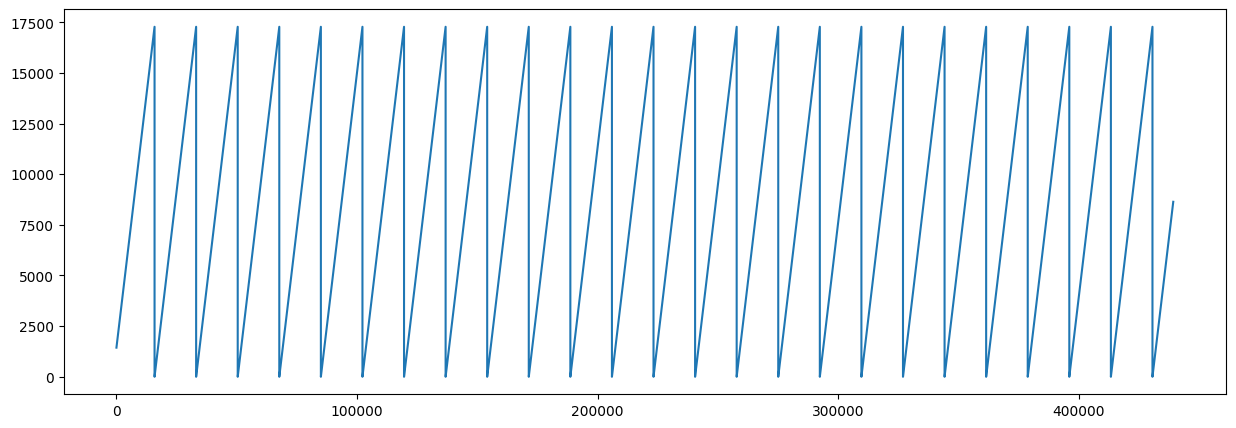

In [17]:
plot_all(np.expand_dims(series.series["2b8d87addea9"].serie['daily_step'].iloc[161818:],axis =-1))

In [23]:
grupped = series.series["2b8d87addea9"].serie.groupby(['daily_step']).value_counts()
grupped

daily_step  step    timestamp                 anglez    enmo    enmo_ma  anglez_ma  gradient_anglez_ma  anglez_ediff1d_transformed  event  event_multi_wakeup  event_multi_awake
0           4860    2018-11-02T00:00:00-0400  -56.5327  0.0000  0.00000  -56.53270   0.000000           1.000000                    1      0                   0                    1
            22140   2018-11-03T00:00:00-0400  -58.6670  0.0000  0.00000  -58.66700   0.000000           1.000000                    0      0                   0                    1
            350460  2018-11-21T23:00:00-0500  -85.0670  0.0000  0.03201  -84.06901   0.237533           0.924795                    0      0                   1                    1
            367740  2018-11-22T23:00:00-0500   88.7318  0.0000  0.00000   88.73180   0.000000           1.000000                    0      0                   0                    1
            385020  2018-11-23T23:00:00-0500   6.8630   0.0711  0.07352  -8.33000   -5.736167  

In [138]:
steps = series.series["2b8d87addea9"].mask['daily_step'].iloc[253309]- series.series["2b8d87addea9"].mask['daily_step'].iloc[124440]
diff = 253309 - 124440
print(steps,diff)

-10091 128869


In [133]:
series.series["2b8d87addea9"].serie_events.iloc[:30]

,series_id,night,event,step,timestamp
2598,2b8d87addea9,1,onset,4224.0,2018-11-01T23:07:00-0400
2599,2b8d87addea9,1,wakeup,6204.0,2018-11-02T01:52:00-0400
2600,2b8d87addea9,2,onset,22584.0,2018-11-03T00:37:00-0400
2601,2b8d87addea9,2,wakeup,28872.0,2018-11-03T09:21:00-0400
2602,2b8d87addea9,3,onset,42792.0,2018-11-04T04:41:00-0400
2603,2b8d87addea9,3,wakeup,45624.0,2018-11-04T08:37:00-0400
2604,2b8d87addea9,4,onset,57456.0,2018-11-05T01:03:00-0400
2605,2b8d87addea9,4,wakeup,60300.0,2018-11-05T05:00:00-0400
2606,2b8d87addea9,5,onset,73860.0,2018-11-05T23:50:00-0400
2607,2b8d87addea9,5,wakeup,78744.0,2018-11-06T06:37:00-0400


In [136]:
print(series.series["2b8d87addea9"].mask['event'].iloc[124440-20:124440+20])


124420    2
124421    2
124422    2
124423    2
124424    2
124425    2
124426    2
124427    2
124428    2
124429    2
124430    2
124431    2
124432    2
124433    2
124434    2
124435    2
124436    2
124437    2
124438    2
124439    2
124440    0
124441    0
124442    0
124443    0
124444    0
124445    0
124446    0
124447    0
124448    0
124449    0
124450    0
124451    0
124452    0
124453    0
124454    0
124455    0
124456    0
124457    0
124458    0
124459    0
Name: event, dtype: int64


In [131]:
print(series.series["2b8d87addea9"].mask['event'].iloc[253309-20:253309+20])

253289    0
253290    0
253291    0
253292    0
253293    0
253294    0
253295    0
253296    0
253297    0
253298    0
253299    0
253300    0
253301    0
253302    0
253303    0
253304    0
253305    0
253306    0
253307    0
253308    0
253309    2
253310    2
253311    2
253312    2
253313    2
253314    2
253315    2
253316    2
253317    2
253318    2
253319    2
253320    2
253321    2
253322    2
253323    2
253324    2
253325    2
253326    2
253327    2
253328    2
Name: event, dtype: int64


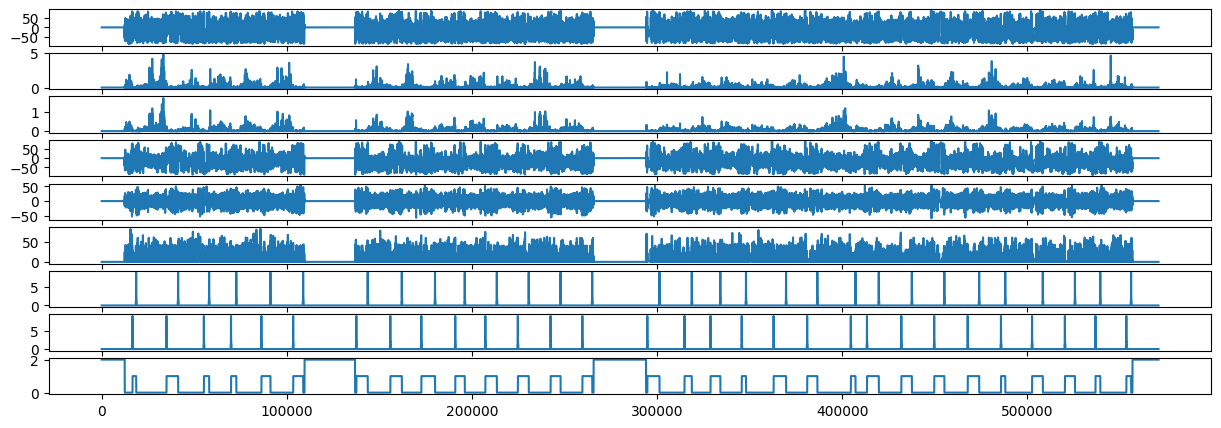

In [108]:
plot_all(series.series["2b8d87addea9"].slices)

In [104]:
12420+601020+ 17280-7920

622800

In [29]:
p = paths.test_series.glob(f'*.{data.series_format}')
test_series_files = [PurePosixPath(x).stem for x in p if x.is_file()]
test_serie_id = series_files[0]
test_serie_id
!cd
test_serie_filename = test_serie_id+"."+data.series_format
test_serie_path = paths.test_series / serie_filename
test_serie_events = df_events[df_events["series_id"]==serie_id]
test_serie_path

d:\DEV\Projekty\PythonProjects\Kaggle\Detect-sleep-state


WindowsPath('dataloader/datasets/v1/test-series/03d92c9f6f8a.csv')

In [50]:
%load_ext autoreload
%autoreload 2 
from dataloader.dataloader_v3 import TestSerie

test_serie = TestSerie(serie_id,test_serie_path,test_serie_events,gradient_difference = data.gradient_difference, moving_average_gradient_samples = data.moving_average_gradient_samples, moving_average_enmo_samples = data.moving_average_enmo_samples, record_interval = data.record_interval )
test_serie.create_slices()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%load_ext autoreload
%autoreload 2 

from dataloader.dataloader_v3 import Test_Series

test_series = Test_Series(data=data,paths=paths)
test_series.createSeries()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%load_ext autoreload
%autoreload 2 

from dataloader.dataloader_v3 import Dataset


ds = Dataset(series,test_series, normalize=True,positional_encoding=True,outputs_no=-3)
ds.make_dataset()
windowed_train_ds = ds.get_windowed_trainset(17280//3,32,64)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [52]:
windowed_train_ds = ds.get_windowed_trainset(17280//3,32,64)

Cause: could not parse the source code of <function Dataset.windowed_dataset.<locals>.<lambda> at 0x000001A04A044430>: no matching AST found among candidates:
# coding=utf-8
lambda x: x != 'series_id'
# coding=utf-8
lambda window: (window[:, :outputs_no], tf.one_hot(tf.dtypes.cast(window[:, -3], tf.int8), depth=multi_class_range), tf.one_hot(tf.dtypes.cast(window[:, -2], tf.int8), depth=multi_class_range), tf.one_hot(tf.dtypes.cast(window[:, -1], tf.int8), depth=num_classes))
# coding=utf-8
lambda window: window.batch(window_size)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function Dataset.windowed_dataset.<locals>.<lambda> at 0x000001A04A044430>: no matching AST found among candidates:
# coding=utf-8
lambda x: x != 'series_id'
# coding=utf-8
lambda window: (window[:, :outputs_no], tf.one_hot(tf.dtypes.cast(window[:, -3], tf.int8), depth=multi_class_range), tf.one_hot(tf.dtypes.cast(window[:, 

In [51]:
window_size = 17280//3
batch_size = 32
shuffle_buffer = 64
num_classes = np.max(ds.ds[:,-1])+1
outputs_no = -3
print(num_classes)
multi_class_range = np.max(ds.ds[:,-2]+1)
print(multi_class_range)
ds.ds.shape
dataset = tf.data.Dataset.from_tensor_slices(ds.ds)
dataset = dataset.window(window_size, shift=window_size, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_size))
dataset = dataset.map(lambda window: (window[:,:outputs_no], 
                                        (
                                            tf.one_hot(tf.dtypes.cast(window[:,-3],tf.int8),depth=multi_class_range),
                                            tf.one_hot(tf.dtypes.cast(window[:,-2],tf.int8),depth=multi_class_range), 
                                            tf.one_hot(tf.dtypes.cast(window[:,-1],tf.int8),depth=num_classes))
))
# Shuffle the windows
dataset = dataset.shuffle(shuffle_buffer)
# Create batches of windows
dataset = dataset.batch(batch_size).prefetch(1)
for window in dataset:
    print(window)
    # print(len([elem.numpy().shape for elem in window]))
    break

3.0
10.0
(<tf.Tensor: shape=(32, 5760, 7), dtype=float64, numpy=
array([[[-9.75840521e-01, -6.78840000e+01,  0.00000000e+00, ...,
         -6.78840000e+01,  0.00000000e+00,  1.00000000e+00],
        [-7.11096868e-01, -6.78840000e+01,  0.00000000e+00, ...,
         -6.78840000e+01,  0.00000000e+00,  1.00000000e+00],
        [ 2.07425965e-01, -6.78840000e+01,  0.00000000e+00, ...,
         -6.78840000e+01,  0.00000000e+00,  1.00000000e+00],
        ...,
        [-1.87678799e-01, -7.03291000e+01,  3.60000000e-03, ...,
         -7.03291000e+01,  0.00000000e+00,  1.00000000e+00],
        [ 7.25115141e-01, -7.03291000e+01,  3.60000000e-03, ...,
         -7.03291000e+01,  0.00000000e+00,  1.00000000e+00],
        [ 9.71241565e-01, -7.03291000e+01,  3.60000000e-03, ...,
         -7.03291000e+01,  0.00000000e+00,  1.00000000e+00]],

       [[ 1.00000000e+00, -3.19620000e+01,  0.00000000e+00, ...,
         -3.20554900e+01,  0.00000000e+00,  1.00432316e+00],
        [ 5.40302306e-01, -3.19620000e

In [24]:



multi_class_range = np.max(series[:,-2]+1)
dataset = series.reshape(-1,series.shape[-1])
# Generate a TF Dataset from the series values
dataset = tf.data.Dataset.from_tensor_slices(dataset)

# Window the data but only take those with the specified size
dataset = dataset.window(window_size, shift=window_size, drop_remainder=drop_remainder)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(window_size))

#
# Create tuples with features and labels 
dataset = dataset.map(lambda window: (window[:,:outputs_no], 
                                        tf.one_hot(tf.dtypes.cast(window[:,-3],tf.int8),depth=multi_class_range),
                                        tf.one_hot(tf.dtypes.cast(window[:,-2],tf.int8),depth=multi_class_range), 
                                        tf.one_hot(tf.dtypes.cast(window[:,-1],tf.int8),depth=num_classes)))

# Shuffle the windows
dataset = dataset.shuffle(shuffle_buffer)

# Create batches of windows
dataset = dataset.batch(batch_size).prefetch(1)

1440.0

In [34]:
ds.pos_enc_one_interval.shape

(17280, 1)

In [67]:
%load_ext autoreload
%autoreload 2 

from model.model_multi import Unet_Multi
try: 
    del unet
except:
    pass

unet = Unet_Multi(n_classes=3,multi_class_range=10,n_filters=32)
unet.compile(optimizer='adam',
              loss={
                  "multi_awake" : tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  "multi_sleep": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  "sleep_awake" : tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              },
              loss_weights={
                  "multi_awake": 0.33,
                  "multi_sleep": 0.33,
                  "sleep_awake" : 1.0
              },
              metrics=['accuracy'])
unet.model((17280//3,7)).summary()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1495630287.py, line 17)

In [66]:
ds.test.shape

(51840, 6)

In [8]:
vals = [sum(i) + j[1] - j[0] for i,j in zip(serie.valid_ranges_padding,serie.valid_ranges_table)]
vals

[69120, 34560, 51840, 51840]

In [31]:
serie.mask.iloc

,step,timestamp,anglez,enmo,daily_step,enmo_ma,anglez_ma,gradient_anglez_ma,event,event_multi_wakeup,event_multi_awake
0,0,2018-05-31T12:00:00-0400,38.8929,0.0803,8640,0.080300,38.892900,-9.518500,0,0,0
1,1,2018-05-31T12:00:05-0400,29.3744,0.0752,8641,0.077750,34.133650,-5.176200,0,0,0
2,2,2018-05-31T12:00:10-0400,37.2251,0.1791,8642,0.111533,35.164133,-0.523700,0,0,0
3,3,2018-05-31T12:00:15-0400,46.9370,0.0922,8643,0.106700,38.107350,6.526067,0,0,0
4,4,2018-05-31T12:00:20-0400,60.4867,0.0342,8644,0.092200,42.583220,7.507167,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48668,48668,2018-06-03T07:35:40-0400,-29.6551,0.0040,5468,0.020190,-26.580590,-2.818183,0,0,0
48669,48669,2018-06-03T07:35:45-0400,-43.2982,0.0176,5469,0.014670,-27.088360,-6.179783,0,0,0
48670,48670,2018-06-03T07:35:50-0400,-49.6714,0.0179,5470,0.011830,-29.677520,-7.027717,0,0,0
48671,48671,2018-06-03T07:35:55-0400,-50.0975,0.0175,5471,0.013130,-32.805300,-4.613850,0,0,0


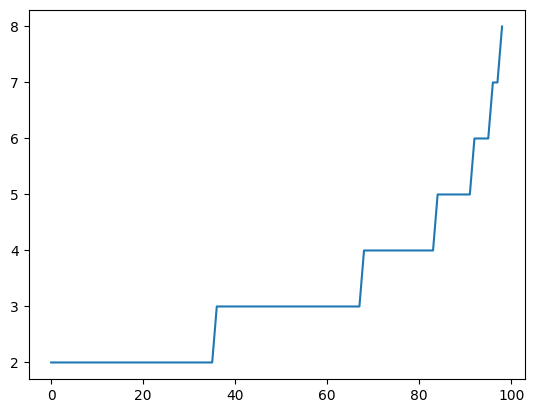

In [27]:
multiclass_label_list ={
    1 : 9,
    2 : 8,
    4 : 7,
    8 : 6,
    16 : 5,
    32 : 4,
    64 : 3,
    128 : 2,
    256 : 1,
    }
step_multi_seg_list_wakeup = np.full(shape =(serie.serie_length,),fill_value=0,dtype= np.int64)
step_multi_seg_list_onset = np.full(shape =(serie.serie_length,),fill_value=0,dtype= np.int64)
encoded_list = TrainSerie.encode_list
def set_multi_seg_list(event_no, event):
    """sets multi class segmentation list with different values - depends on the offset value to the event
    """
    
    for offset in sorted(TrainSerie.multiclass_label_list.keys(),reverse=True):
        if event == encoded_list["wakeup"]:
            event_min = event_no-offset if event_no-offset > 0 else 0 
            event_max = event_no+offset if event_no+offset+1 < step_multi_seg_list_wakeup.shape[0] else step_multi_seg_list_wakeup.shape[0] 
            step_multi_seg_list_wakeup[event_min: event_max] = TrainSerie.multiclass_label_list[offset]
        elif event == encoded_list["onset"]:
            event_min = event_no-offset if event_no-offset > 0 else 0 
            event_max = event_no+offset if event_no+offset+1 < step_multi_seg_list_onset.shape[0] else step_multi_seg_list_onset.shape[0] 
            step_multi_seg_list_onset[event_min: event_max] = TrainSerie.multiclass_label_list[offset]

set_multi_seg_list(step_multi_seg_list_onset.shape[0], 1)      
plt.plot(step_multi_seg_list_onset[-100:-1])      

<generator object Path.glob at 0x000001E1469B7AE0>

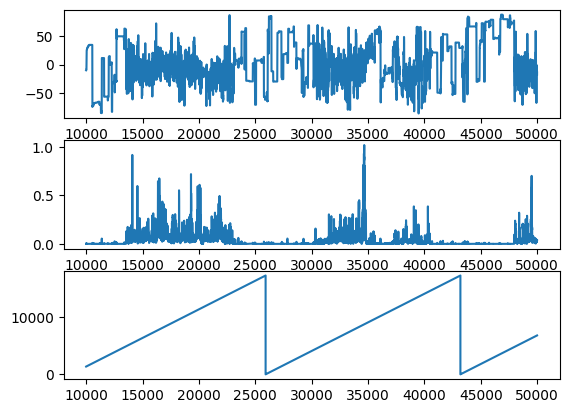

In [ ]:
# t_serie['ds_anglez'] = t_serie['daily_step']*t_serie['anglez']
# t_serie['ds_enmo'] = t_serie['daily_step']*t_serie['enmo']

import matplotlib.pyplot as plt

start = 10000
stop = 50000

plt.subplot(3,1,1)
plt.plot((t_serie['anglez_ma'])[start:stop])
plt.subplot(3,1,2)
plt.plot((t_serie['enmo_ma'])[start:stop])
plt.subplot(3,1,3)
plt.plot((t_serie['daily_step'])[start:stop])
p


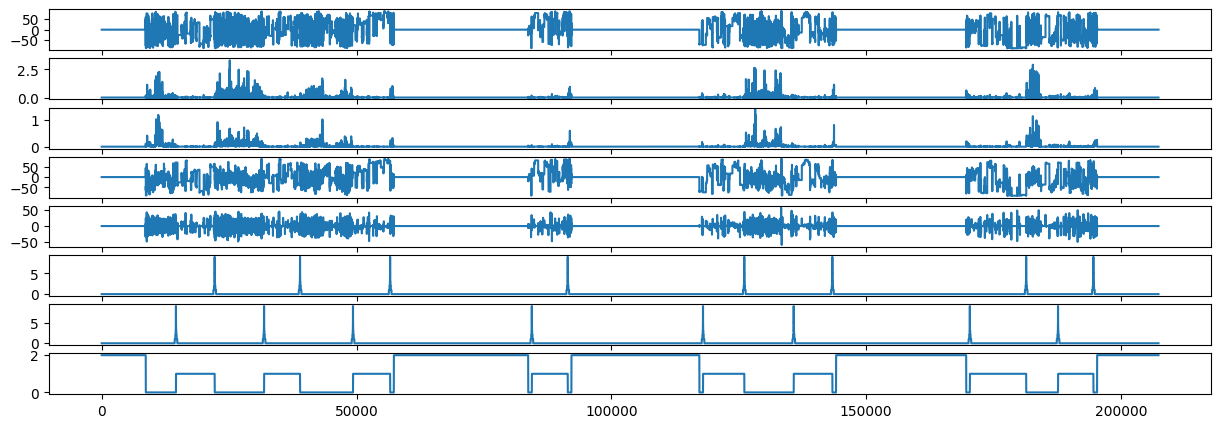

In [32]:
def plot_all (array):
    plt.figure(figsize=(15,5))
    array_len = int(array.shape[-1])
    for i in range(array_len):
        plt.subplot(array_len,1,i+1)
        plt.plot(array[:,i])

plot_all(serie.slices)

In [ ]:
a = np.clip(np.tan(m_serie['anglez']/180*np.pi),-0.9999999,0.9999999)
b = (m_serie['enmo']+1)**2
axay_sqsum = b/ (1+a**2)
axay = np.sqrt(axay_sqsum)
az = a*axay


Text(0.5, 1.0, 'az')

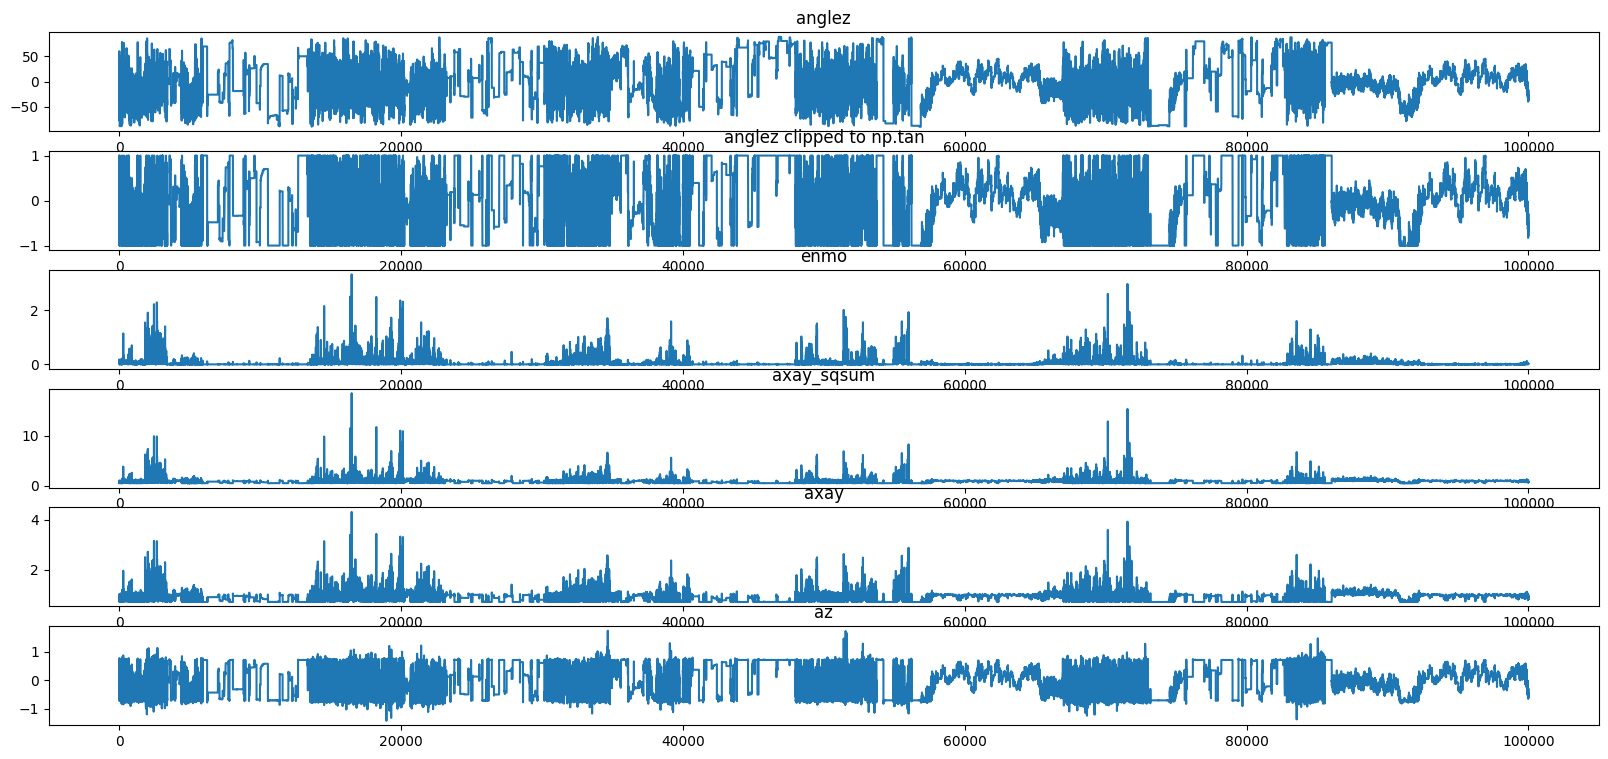

In [127]:

a = np.clip(np.tan(m_serie['anglez']/180*np.pi),-0.9999999,0.9999999)
b = (m_serie['enmo']+1)**2
axay_sqsum = b/ (1+a**2)
axay = np.sqrt(axay_sqsum)
az = a*axay


start = 0000
stop = 100000
plt.figure(figsize =(20,9))
plt.subplot(6,1,1)
plt.plot(m_serie['anglez'][start:stop])
plt.title('anglez')
plt.subplot(6,1,2)
plt.plot(a[start:stop])
plt.title('anglez clipped to np.tan')
plt.subplot(6,1,3)
plt.plot(m_serie['enmo'][start:stop])
plt.title('enmo')
plt.subplot(6,1,4)
plt.plot(axay_sqsum[start:stop])
plt.title('axay_sqsum')
plt.subplot(6,1,5)
plt.plot(axay[start:stop])
plt.title('axay')
plt.subplot(6,1,6)
plt.plot(az[start:stop])
plt.title('az')

In [1]:

from dataloader.dataloader_v3 import Feature
m_serie = serie.mask
start = 0000
stop = 300000
f1 = np.ediff1d(m_serie['anglez'],5)
f2 = np.clip(np.power(2, f1/5),-1000,200)
f3 = Feature.serie_moving_average(np.expand_dims(f2,axis  = -1),average_val=[20])
f4 = Feature.serie_moving_average(np.expand_dims(f2,axis  = -1),average_val=[3])
plt.figure(figsize =(20,9))
plt.subplot(6,1,1)
plt.plot(f1[start:stop])
plt.subplot(6,1,2)
plt.plot(f2[start:stop])
plt.subplot(6,1,3)
plt.plot(f3[start:stop])
plt.subplot(6,1,4)
plt.plot(f4[start:stop])
plt.subplot(6,1,5)
plt.plot((m_serie['event'])[start:stop])
plt.subplot(6,1,6)
plt.plot(m_serie['anglez'][start:stop])

NameError: name 'serie' is not defined

In [74]:
np.power(2, np.ediff1d(m_serie['anglez'],2))

array([1.36347125e-03, 2.30832092e+02, 8.38635447e+02, ...,
       5.00406316e+00, 5.99944105e-01, 4.00000000e+00])

In [112]:
serie.valid_ranges_table

[[0, 48673], [75036, 83521], [177744, 204565], [230100, 255781]]

In [45]:
import tensorflow as tf

In [29]:
x = m_serie['daily_step']


def pos_enc(x):
    outputs =[]
    for omega in [1]:#,24]:
        sin = tf.math.sin(x*2.0*np.pi*omega)
        #cos = tf.math.cos(x*2.0*np.pi*omega)
        outputs.append(sin)
        #outputs.append(cos)
    return tf.concat(outputs,axis = -1)
# outputs = tf.stack(outputs)
# print(len(outputs))
# plt.figure(figsize=(20,5))
# plt.plot(outputs[0:100])



In [30]:
outputs = pos_enc(x)

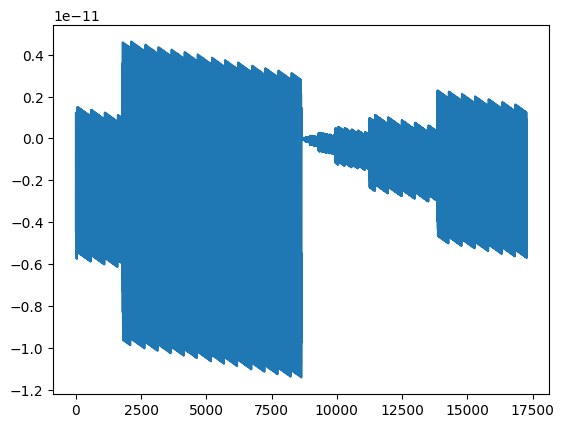

In [40]:
plt.plot(outputs[:int(daily_steps)])

In [44]:
len(np.unique(outputs.numpy()))

17280

In [250]:
x= np.array([1,2,3,4,5,6,7,8,9,10])   
outputs =[]
for omega in [1,24]:
    sin = 1*omega*x
    cos = 2*omega*x
    outputs.append(sin)
    outputs.append(cos)
print(outputs)
outputs = tf.concat(outputs,axis =-1)
outputs

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]), array([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240]), array([ 48,  96, 144, 192, 240, 288, 336, 384, 432, 480])]


<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,   2,   4,   6,
         8,  10,  12,  14,  16,  18,  20,  24,  48,  72,  96, 120, 144,
       168, 192, 216, 240,  48,  96, 144, 192, 240, 288, 336, 384, 432,
       480])>

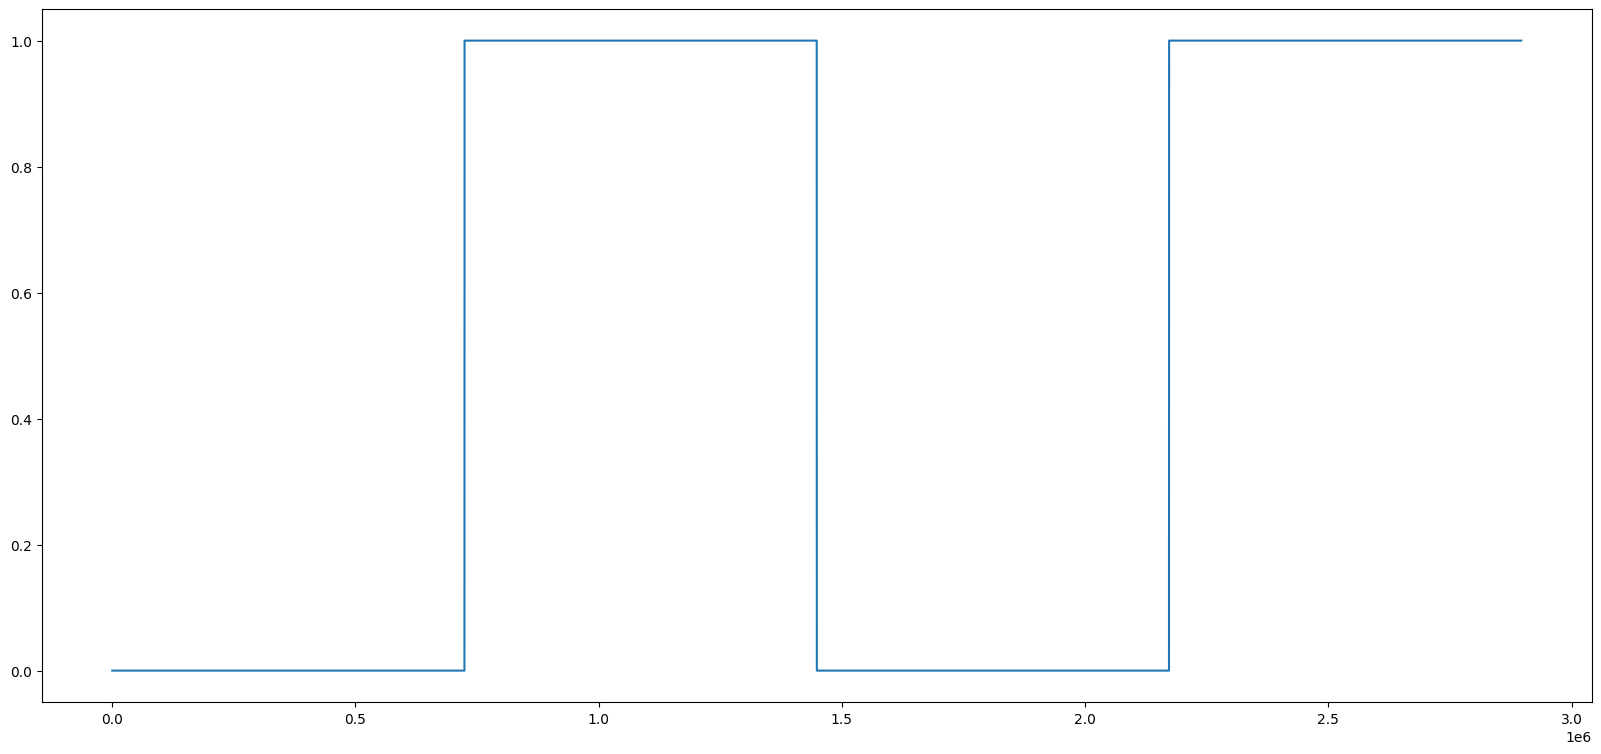

In [253]:
day_feature = tf.keras.layers.Lambda(pos_enc)(x)
plt.figure(figsize =(20,9))
plt.plot(day_feature.numpy())

724139/day_feature.numpy().shape[0]

In [232]:
724139/day_feature.numpy().shape[0]

0.24999965476289115

In [231]:
day_feature.numpy().shape

(2896560,)

In [ ]:
x_diff_1 = Lambda(lambda x: tf.roll(x, shift=1, axis=1) - x)(feature_1ch)
x_diff_2 = Lambda(lambda x: tf.roll(x, shift=-1, axis=1) - x)(feature_1ch)
x_diff = Lambda(lambda x: tf.math.abs(x[0]) + tf.math.abs(x[1]))([x_diff_1, x_diff_2])

In [259]:
y_true = np.array([1,-1,1,0])
y_pred = np.array([0.45,0.34,0.52,0.32])


mask = tf.cast(y_true>=-1e-7,tf.float32)
y_true = y_true*mask
y_pred = y_pred*mask


epsilon = tf.keras.backend.epsilon()
y_true = tf.clip_by_value(y_true,epsilon,1.-epsilon)

print(mask)

print(y_true)

print(y_pred)


tf.Tensor([1. 0. 1. 1.], shape=(4,), dtype=float32)
tf.Tensor([9.999999e-01 1.000000e-07 9.999999e-01 1.000000e-07], shape=(4,), dtype=float32)
tf.Tensor([0.45 0.   0.52 0.32], shape=(4,), dtype=float32)


In [316]:
# find delta matrix for simpler error  ?? 

y = m_serie['anglez']
mask = np.ones_like(y)
#get first padding
pad_left = int(m_serie['daily_step'][0])
#get last padding
pad_right =  int(daily_steps) - 1 - int(m_serie['daily_step'][-1:])% int(daily_steps)
#add padding for full day 
y = np.pad(y,(pad_left,pad_right),'constant',constant_values=(0,0))
mask = np.pad(mask,(pad_left,pad_right),'constant',constant_values=(0,0))
#reshape 
y =y.reshape(-1,int(daily_steps))
mask  = mask.reshape(-1,int(daily_steps))

delta_matrix = y[np.newaxis,:,:]- y[:,np.newaxis,:]
mask_matrix = mask[np.newaxis,:,:]* mask[:,np.newaxis,:]
print(delta_matrix)
delta_matrix_full = (delta_matrix==0) * mask_matrix 
delta_matrix_full
delta_matrix = np.sum(delta_matrix_full, axis=0) - 1 
delta_matrix
nan_counter = np.cumsum(delta_matrix > 0 ,axis = 0)
nan_exist_other_day = np.any(delta_matrix > 0, axis=0, keepdims=True) # (1, step_for_a_day)
nan_exist_other_day = np.tile(nan_exist_other_day, (delta_matrix.shape[0], 1)) # (num_day, step_for_a_day)
nan_exist_other_day[nan_exist_other_day == 0]


C:\Users\pawel.dubel\AppData\Local\Temp\ipykernel_4592\3369459920.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pad_right =  int(daily_steps) - 1 - int(m_serie['daily_step'][-1:])% int(daily_steps)


[[[  0.       0.       0.     ...   0.       0.       0.    ]
  [-18.5856 -18.5856 -18.5856 ... -43.9187 -43.9187 -43.9187]
  [-62.5043 -62.5043 -62.5043 ...  48.1705  48.1705  48.1705]
  ...
  [-16.2243 -16.2243 -16.2243 ...   2.3613   2.3613   2.3613]
  [-16.2243 -16.2243 -16.2243 ...   2.3613   2.3613   2.3613]
  [-16.2243 -16.2243 -16.2243 ...  18.5856  18.5856  18.5856]]

 [[ 18.5856  18.5856  18.5856 ...  43.9187  43.9187  43.9187]
  [  0.       0.       0.     ...   0.       0.       0.    ]
  [-43.9187 -43.9187 -43.9187 ...  92.0892  92.0892  92.0892]
  ...
  [  2.3613   2.3613   2.3613 ...  46.28    46.28    46.28  ]
  [  2.3613   2.3613   2.3613 ...  46.28    46.28    46.28  ]
  [  2.3613   2.3613   2.3613 ...  62.5043  62.5043  62.5043]]

 [[ 62.5043  62.5043  62.5043 ... -48.1705 -48.1705 -48.1705]
  [ 43.9187  43.9187  43.9187 ... -92.0892 -92.0892 -92.0892]
  [  0.       0.       0.     ...   0.       0.       0.    ]
  ...
  [ 46.28    46.28    46.28   ... -45.8092 -45.8

array([], dtype=bool)

In [ ]:
# create Train Series and Dataset 
import dataloader.dataloader
importlib.reload(dataloader.dataloader)
from dataloader.dataloader import Train_Series,Dataset
try: 
    del series,ds
except:
    pass

series = Train_Series(config.data,config.paths)
series.createSeries()


In [ ]:
ds = Dataset(series)
ds.split_dataset()

X_train = ds.X_train
y_train = ds.y_train
X_test = ds.X_test
y_test = ds.y_test

X_train.shape

In [113]:
numpy_serie = m_serie.to_numpy()
numpy_serie.shape

(724140, 9)

In [229]:
m_serie.to_numpy()[:,:-1]

array([[0, '2018-05-31T12:00:00-0400', 38.8929, ..., 0.0803, 38.8929,
        -9.518499999999996],
       [1, '2018-05-31T12:00:05-0400', 29.3744, ..., 0.07775, 34.13365,
        -5.176199999999998],
       [2, '2018-05-31T12:00:10-0400', 37.2251, ..., 0.11153333333333333,
        35.16413333333333, -0.5236999999999989],
       ...,
       [724137, '2018-07-12T09:44:45-0400', -10.8578, ...,
        0.031810000000000005, -6.80359, -0.08289999999999997],
       [724138, '2018-07-12T09:44:50-0400', -8.5347, ...,
        0.030320000000000003, -6.978490000000001, 1.6955333333333333],
       [724139, '2018-07-12T09:44:55-0400', -9.2718, ...,
        0.030420000000000003, -7.79734, 1.248433333333333]], dtype=object)

In [161]:
a = np.array([[1,2,3,4],[9,10,11,12]])
b = np.array([[5,6,7,8]])


np.concatenate((a,b),axis = 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12],
       [ 5,  6,  7,  8]])

In [178]:
a = np.expand_dims(np.pad(serie.mask.to_numpy()[0:500,0],(5,5),'constant',constant_values=(2,2)),axis = 1)
b = np.expand_dims(np.pad(serie.mask.to_numpy()[0:500,0],(5,5),'constant',constant_values=(2,2)),axis = 1)
np.append(a,b,axis = -1).shape

(510, 2)

In [206]:
a = np.array([[1, 1], [2, 2], [3, 3]])
b = a.flatten()
np.insert(b, [2, 3], [5, 6])


array([1, 1, 5, 2, 6, 2, 3, 3])

In [220]:
m_serie[]

SyntaxError: invalid syntax (2454973522.py, line 1)

In [234]:
slices = None



for valid_range in serie.valid_ranges_table:
    # get start and stop range 
    start  = valid_range[0]
    stop = valid_range[1]

    ds_serie = m_serie['daily_step']
    #declare max daily step - necessary for further calculations
    max_val = int(max(ds_serie))
    # declare left and right padding values
    left_pad = int(ds_serie[start])
    right_pad = max_val -ds_serie[stop]

    #variant 1 - padding except daily step
    # get a slice from a series with the start/stop range, exclude - daily step - it should be calculated without padding
    # slice = m_serie.drop(columns=['daily_step']).to_numpy()[start:stop+1,:]

    # ds_col = m_serie['daily_step'].to_numpy()[start:stop+1]
    # ds_col = np.append(ds_col,[i for i in range(m_serie['daily_step'][stop]+1, max_val+1)])
    # ds_col = np.insert(ds_col,[0 for i in range(0,left_pad)],[i for i in range(0,left_pad)])

    # new_slice = np.append(ds_col,slice_mask,axis = -1)
    

    # new_slice = np.expand_dims(ds_col,axis=1)

    # variant 2 - pad all 
    slice = m_serie.to_numpy()[start:stop+1,2:] # exclude step,timestamp
    new_slice = None
    # loop over featuers except target value 
    for i in range(slice.shape[-1]-1):
        padded_slice = np.expand_dims(np.pad(slice[:,i],(left_pad,right_pad),'constant',constant_values=(0,0)),axis =1)

        if new_slice is None:
            new_slice  = padded_slice
        else:
            new_slice = np.append(new_slice, padded_slice,axis = -1)

    # declare mask from slice mask 
    slice_mask = slice[:,-1]
    padded_val = 2 # add value from dict here! 
    slice_mask = np.append(slice_mask,[padded_val for i in range(ds_serie[stop]+1, max_val+1)])
    slice_mask = np.insert(slice_mask,[0 for i in range(0,left_pad)],[padded_val for i in range(0,left_pad)])
    slice_mask = np.expand_dims(slice_mask,axis = 1)
    # add mask 
    new_slice = np.append(new_slice, slice_mask,axis = -1)

    if slices is None:
        slices = new_slice
    else:
        try:
            slices  = np.concatenate((slices,new_slice),axis = 0)
        except ValueError:
            print(slices.shape,new_slice.shape)
            raise ValueError

    del new_slice
    del slice 

slices.shape

(207360, 7)

In [ ]:
def positional_encoding

[[ 1.        ]
 [ 0.54030231]
 [-0.41614684]
 [-0.9899925 ]
 [-0.65364362]
 [ 0.28366219]
 [ 0.96017029]
 [ 0.75390225]
 [-0.14550003]
 [-0.91113026]
 [-0.83907153]
 [ 0.0044257 ]
 [ 0.84385396]
 [ 0.90744678]
 [ 0.13673722]
 [-0.75968791]
 [-0.95765948]
 [-0.27516334]
 [ 0.66031671]
 [ 0.98870462]
 [ 0.40808206]
 [-0.54772926]
 [-0.99996083]
 [-0.53283302]
 [ 0.42417901]
 [ 0.99120281]
 [ 0.64691932]
 [-0.29213881]
 [-0.96260587]
 [-0.74805753]
 [ 0.15425145]
 [ 0.91474236]
 [ 0.83422336]
 [-0.01327675]
 [-0.84857027]
 [-0.90369221]
 [-0.12796369]
 [ 0.76541405]
 [ 0.95507364]
 [ 0.26664293]
 [-0.66693806]
 [-0.98733928]
 [-0.39998531]
 [ 0.5551133 ]
 [ 0.99984331]
 [ 0.52532199]
 [-0.43217794]
 [-0.99233547]
 [-0.64014434]
 [ 0.30059254]
 [ 0.96496603]
 [ 0.7421542 ]
 [-0.16299078]
 [-0.91828279]
 [-0.82930983]
 [ 0.02212676]
 [ 0.85322011]
 [ 0.89986683]
 [ 0.11918014]
 [-0.77108022]
 [-0.95241298]
 [-0.25810164]
 [ 0.67350716]
 [ 0.98589658]
 [ 0.39185723]
 [-0.56245385]
 [-0.99964

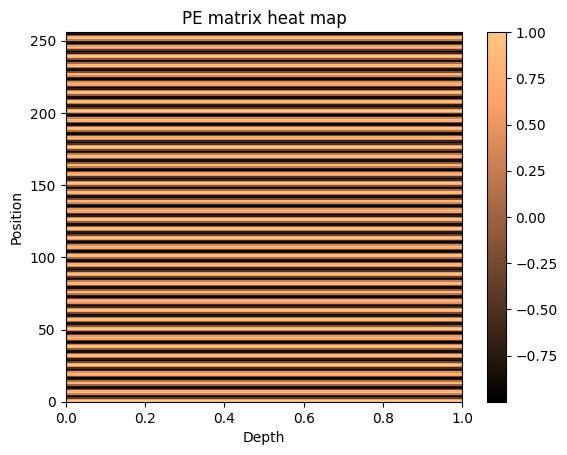

In [258]:
#### TensorFlow only version ####
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = tf.range(max_position, dtype=tf.float32)
    mask = tf.range(d_model)
    sin_mask = tf.cast(mask%2, tf.float32)
    cos_mask = 1-sin_mask
    exponent = 2*(mask//2)
    exponent = tf.cast(exponent, tf.float32)/tf.cast(d_model, tf.float32)
    freqs = min_freq**exponent
    angles = tf.einsum('i,j->ij', position, freqs)
    pos_enc = tf.math.cos(angles)*cos_mask + tf.math.sin(angles)*sin_mask
    return pos_enc

#### Numpy version ####
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    print(pos_enc)
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    print(pos_enc)
    return pos_enc
    
### Plotting ####
d_model = 1
max_pos = 256
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()

In [283]:
#### Numpy version ####
def positional_encoding(max_position,repeats : int, d_model, min_freq=1e-4):
    """
    max_ position - maximum length of the data to encode 
    repeats - when the encoding should be repeated due to repeated intervals (e.g. every day in time-series)
    d_model - dimension of the encoding 
    min_freq - minimum frequency 
    """
    full_repeats = max_position * np.floor(repeats)
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    for i in range(full_repeats):
        if i == 0: 
            rep_pos_enc = np.append(pos_enc,pos_enc,axis = 0)
        else:
            rep_pos_enc = np.append(rep_pos_enc,pos_enc,axis = 0)
    
    return rep_pos_enc


mask_enc = positional_encoding(max(slices[:,2]+1),1)
plt.figure(figsize=(20,10))
len(np.unique(mask_enc))

17280

<Figure size 2000x1000 with 0 Axes>

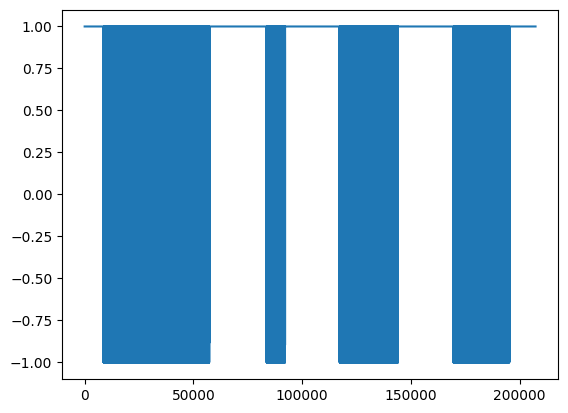

In [269]:
#### Numpy version ####
# def positional_encoding(max_position, d_model, min_freq=1e-4):
    # position = np.arange(max_position)
def positional_encoding(serie, d_model, min_freq=1e-4):
    position = serie
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

mask_enc = positional_encoding(slices[:,2].astype(np.float64),1)
plt.plot(mask_enc)

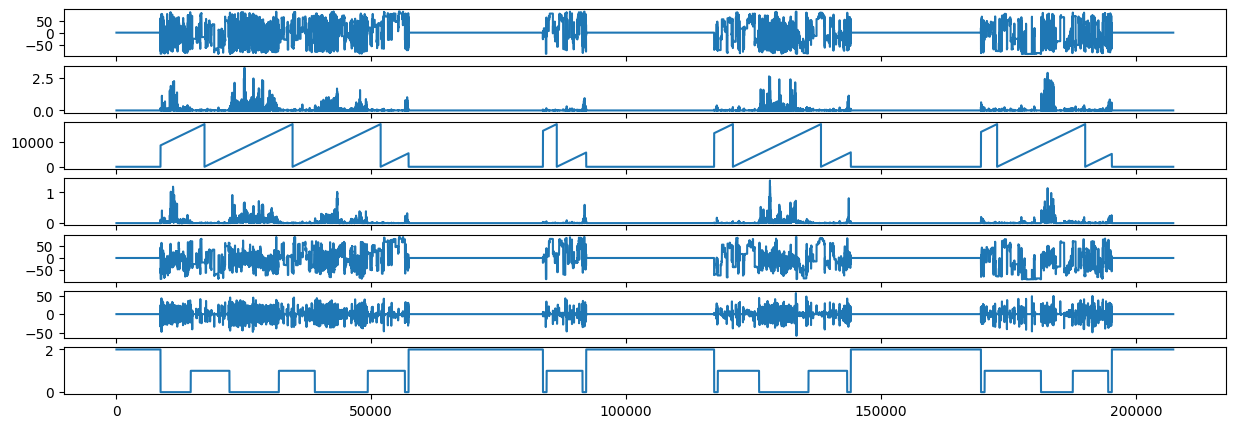

In [243]:
plot_all(slices)